In [35]:
import tdmh
import requests
from nltk.corpus import stopwords
import re
import os
from collections import Counter 
from nltk import word_tokenize , sent_tokenize
import matplotlib.pyplot as plt
import seaborn as sns


from nltk.corpus import stopwords
stop_words = list(set(stopwords.words('english')))

In [28]:
corpus = []
dir = 'HP_Corpus'

for file in sorted(os.listdir(dir)):
    corpus.append(os.path.join(dir,file))


## Calculate word frequencies per book

In [29]:
stop_words.extend(['Harry','Potter','Hermione','Ron','I','said'])

for book in corpus:
    print('\n'+book)

    file = open(book,encoding='utf-8')
    full_text = file.read()

    all_words = word_tokenize(full_text)
    words = []
    for w in all_words:
        if w not in stop_words and re.search( r'\w' , w ):
            words.append(w.lower())
   
    freq = Counter(words)
    for w,freq in freq.most_common(20):
        print( f'{w} ({freq})')
    


HP_Corpus/Book 1 - The Philosopher's Stone.txt
he (548)
stone (423)
hagrid (370)
page (349)
philosophers (347)
rowling (347)
j.k. (336)
the (314)
it (288)
back (255)
one (251)
got (206)
could (198)
get (194)
like (192)
they (183)
know (181)
see (178)
professor (177)
looked (169)

HP_Corpus/Book 2 - The Chamber of Secrets.txt
chamber (464)
he (435)
secrets (424)
page (391)
j.k. (379)
rowling (379)
the (335)
back (276)
it (258)
lockhart (234)
malfoy (221)
one (216)
could (211)
you (211)
professor (192)
got (188)
but (181)
like (178)
around (173)
weasley (171)

HP_Corpus/Book 3 - The Prisoner of Azkaban.txt
he (618)
azkaban (530)
page (497)
prisoner (490)
j.k. (486)
rowling (486)
professor (414)
lupin (407)
the (400)
black (381)
back (353)
it (309)
you (290)
one (287)
hagrid (267)
snape (246)
around (246)
looked (242)
like (240)
could (231)

HP_Corpus/Book 4 - The Goblet of Fire.txt
he (1132)
fire (925)
goblet (877)
page (821)
rowling (810)
j.k. (786)
the (743)
dumbledore (594)
back (585

## Frequencies per segment

HP_Corpus/Book 1 - The Philosopher's Stone.txt


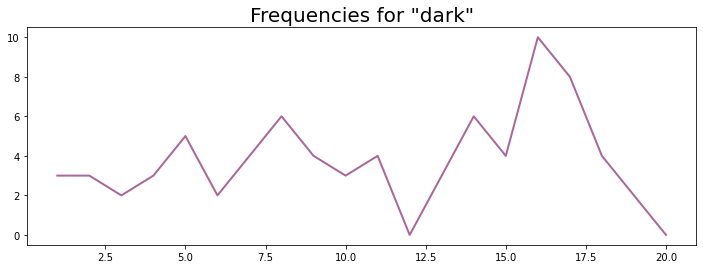

In [30]:
segments = []
nr_segments = 20
keyword = 'dark'

book = corpus[0] 
print(book)
file = open(book,encoding='utf-8')
full_text = file.read()

all_words = tdmh.tokenise( full_text )
segmentSize = int( len(all_words) / nr_segments )

count_words = 0
text = ''

for word in all_words:
    count_words += 1
    text += word + ' '

    ## This line below used the modulo operator:
    ## We can use it to test if the first number is
    ## divisible by the second number
    if count_words % segmentSize == 0:
        segments.append(text.strip())
        text = ''


segment_freq = []        
for s in segments:
    hits = re.findall( keyword, s , re.IGNORECASE )
    segment_freq.append(len(hits))

    
fig = plt.figure( figsize = ( 12, 4))
ax = sns.lineplot( x= range(1,nr_segments+1), y=  segment_freq , 
                  color= '#AA6799', linestyle='solid',linewidth=2 )

ax.set_title( f'Frequencies for "{keyword}"' , size = 20) 

plt.show()       

## Average Sentence length

In [46]:
avg_sent_len = dict()

for book in corpus:
    print(book)

    file = open(book,encoding='utf-8')
    full_text = file.read()
    
    sentences = sent_tokenize(full_text)
    words = word_tokenize(full_text)
    words = tdmh.remove_punctuation(words)
    
    book_title = book[ book.index('-')+1:].strip()
    book_title = re.sub( '.txt$' , '' , book_title )
    
    avg_sent_len[book_title] = len(words) / len(sentences)


HP_Corpus/Book 1 - The Philosopher's Stone.txt
HP_Corpus/Book 2 - The Chamber of Secrets.txt
HP_Corpus/Book 3 - The Prisoner of Azkaban.txt
HP_Corpus/Book 4 - The Goblet of Fire.txt
HP_Corpus/Book 5 - The Order of the Phoenix.txt
HP_Corpus/Book 6 - The Half Blood Prince.txt
HP_Corpus/Book 7 - The Deathly Hallows.txt


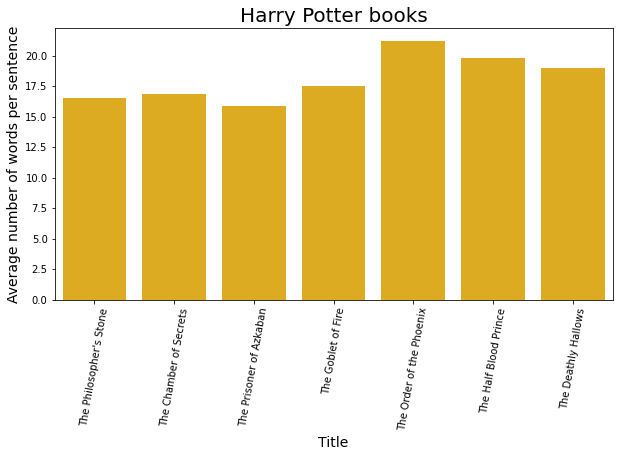

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure( figsize=( 10 , 5 ) )

graph = sns.barplot( x= list(avg_sent_len.keys()), y= list(avg_sent_len.values()) , color = '#fcba03' , dodge=False )

graph.set_title('Harry Potter books' , size = 20) 
graph.set_xlabel('Title' , size = 14 )
graph.set_ylabel('Average number of words per sentence' , size = 14) 


plt.xticks(rotation= 80)

plt.show()
